In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Creating a dataframe and storing data
df = pd.read_csv('/content/nifty_10yrs.csv')
df.head()

Date         Open         High          Low  \
0  2013-12-30 00:00:00+05:30    38.666786    38.695041    37.331744   
1  2013-12-30 00:00:00+05:30  1593.923342  1593.923342  1553.678139   
2  2013-12-30 00:00:00+05:30   314.647645   314.740632   309.231520   
3  2013-12-30 00:00:00+05:30   248.808099   250.981959   243.887267   
4  2013-12-30 00:00:00+05:30   397.459083   399.023178   392.174721   

         Close   Volume  Dividends  Stock Splits     Company  
0    37.614292  5612941        0.0           0.0    ADANIENT  
1  1564.609375   168075        0.0           0.0  HEROMOTOCO  
2   311.253845  2113802        0.0           0.0    HDFCBANK  
3   246.377319  1578700        0.0           0.0     HCLTECH  
4   394.696289   241807        0.0           0.0      GRASIM

In [3]:
df.shape

(120842, 9)

In [4]:
df.describe()   # describtion of data

Open           High            Low          Close  \
count  120842.000000  120842.000000  120842.000000  120842.000000   
mean     1437.633608    1454.109653    1419.667244    1436.523545   
std      2253.773717    2276.028154    2229.055748    2252.267257   
min        15.739931      15.870457      15.332995      15.463521   
25%       301.550153     305.647502     296.746537     301.138649   
50%       679.015380     687.878745     670.507797     678.983673   
75%      1653.873064    1674.674071    1632.166414    1652.880646   
max     26250.000000   26650.000000   26145.650391   26580.300781   

             Volume      Dividends   Stock Splits  
count  1.208420e+05  120842.000000  120842.000000  
mean   7.279751e+06       0.073408       0.000900  
std    1.789070e+07       1.882754       0.070707  
min    0.000000e+00       0.000000       0.000000  
25%    8.705430e+05       0.000000       0.000000  
50%    2.637864e+06       0.000000       0.000000  
75%    6.934536e+06       0.000000       0.000000  
max    6.428460e+08     180.000000      10.000000

In [5]:
df.info()   # information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120842 entries, 0 to 120841
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          120842 non-null  object 
 1   Open          120842 non-null  float64
 2   High          120842 non-null  float64
 3   Low           120842 non-null  float64
 4   Close         120842 non-null  float64
 5   Volume        120842 non-null  int64  
 6   Dividends     120842 non-null  float64
 7   Stock Splits  120842 non-null  float64
 8   Company       120842 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 8.3+ MB


##**Data Cleaning**

checking any null values

In [6]:
df.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Company         0
dtype: int64

checking any duplicated values

In [7]:
df.duplicated().sum()

0

##**Data PreProcessing**

In [8]:
df.nunique()

Date              2467
Open            120077
High            120387
Low             120435
Close           116231
Volume          119651
Dividends          217
Stock Splits         8
Company             50
dtype: int64

In [9]:
df.drop(['Date'],axis = "columns",inplace = True)

In [10]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Company'] = le.fit_transform(df['Company'])
df.head()

Open         High          Low        Close   Volume  Dividends  \
0    38.666786    38.695041    37.331744    37.614292  5612941        0.0   
1  1593.923342  1593.923342  1553.678139  1564.609375   168075        0.0   
2   314.647645   314.740632   309.231520   311.253845  2113802        0.0   
3   248.808099   250.981959   243.887267   246.377319  1578700        0.0   
4   397.459083   399.023178   392.174721   394.696289   241807        0.0   

   Stock Splits  Company  
0           0.0        0  
1           0.0       20  
2           0.0       18  
3           0.0       17  
4           0.0       16

[]

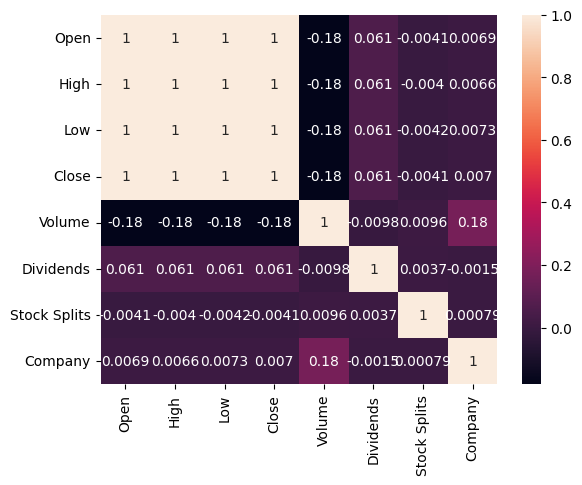

In [11]:
# Correlation Matrix
sns.heatmap(df.corr(),annot=True)
plt.plot()

[]

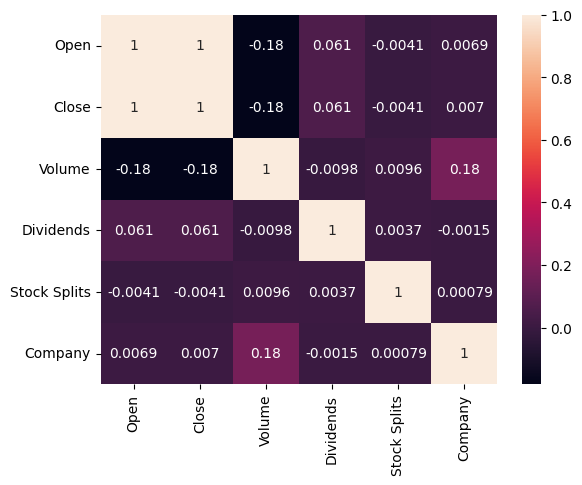

In [12]:
# Dropping columns High and Low to reduce redundancy

df.drop(['High','Low'],axis = "columns",inplace = True)
sns.heatmap(df.corr(),annot=True)
plt.plot()

In [13]:
df.head()

Open        Close   Volume  Dividends  Stock Splits  Company
0    38.666786    37.614292  5612941        0.0           0.0        0
1  1593.923342  1564.609375   168075        0.0           0.0       20
2   314.647645   311.253845  2113802        0.0           0.0       18
3   248.808099   246.377319  1578700        0.0           0.0       17
4   397.459083   394.696289   241807        0.0           0.0       16

Dividing dataset into dependant and independant columns

In [14]:
X = df.drop(['Close'],axis = "columns")
y = df.Close

In [15]:
# Scaling data
from sklearn.preprocessing import StandardScaler

continuous_features = ['Open', 'Volume','Dividends']
scaler = StandardScaler()
X[continuous_features] = scaler.fit_transform(X[continuous_features])

X.head()

Open    Volume  Dividends  Stock Splits  Company
0 -0.620725 -0.093167   -0.03899           0.0        0
1  0.069346 -0.397509   -0.03899           0.0       20
2 -0.498271 -0.288752   -0.03899           0.0       18
3 -0.527484 -0.318661   -0.03899           0.0       17
4 -0.461528 -0.393387   -0.03899           0.0       16

##**EDA**

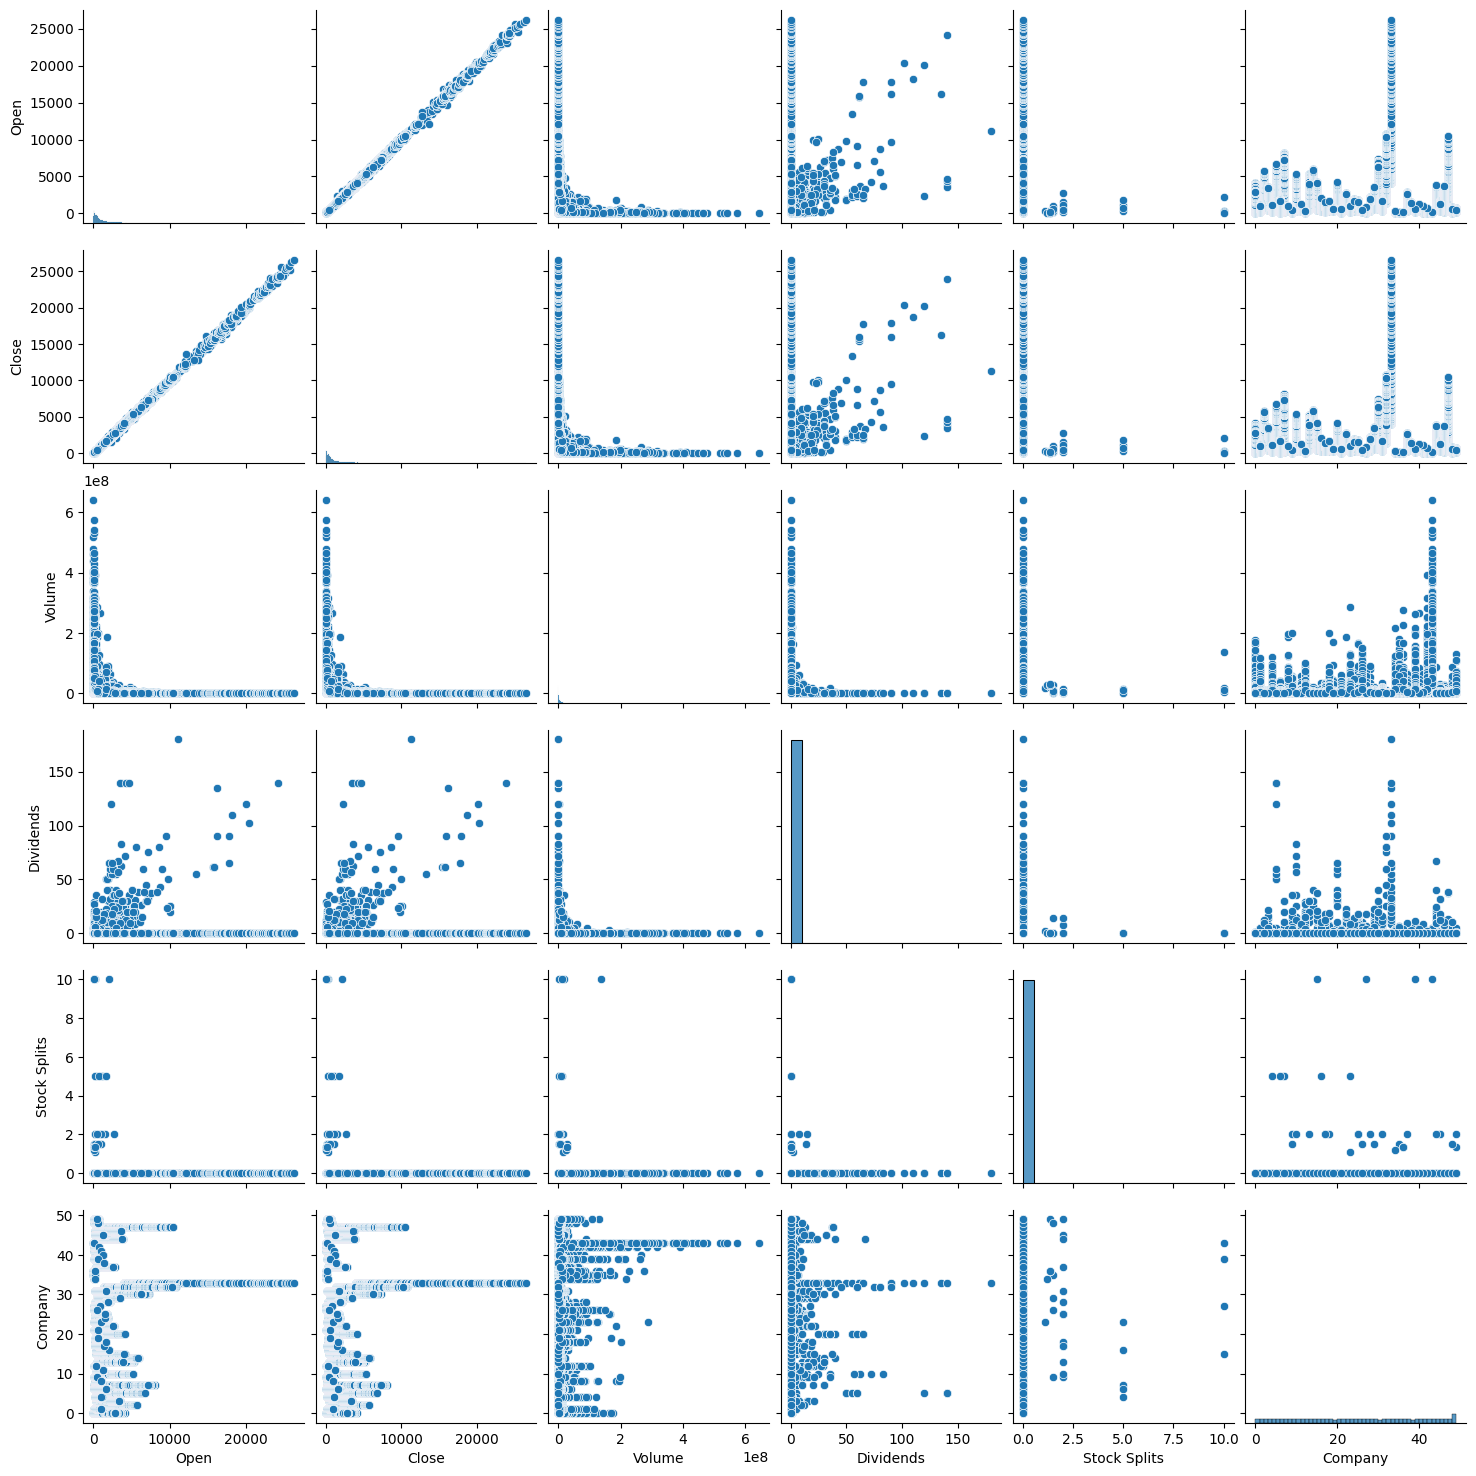

In [16]:
# Pairplot
sns.pairplot(df)
plt.show()

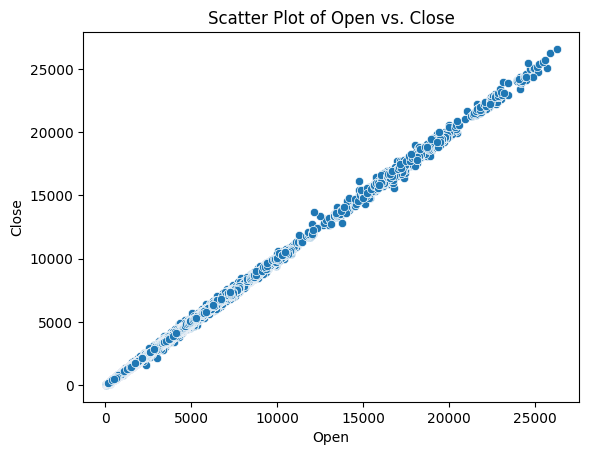

In [17]:
#Scatter Plot
sns.scatterplot(x="Open", y="Close", data=df)
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Scatter Plot of Open vs. Close')
plt.show()

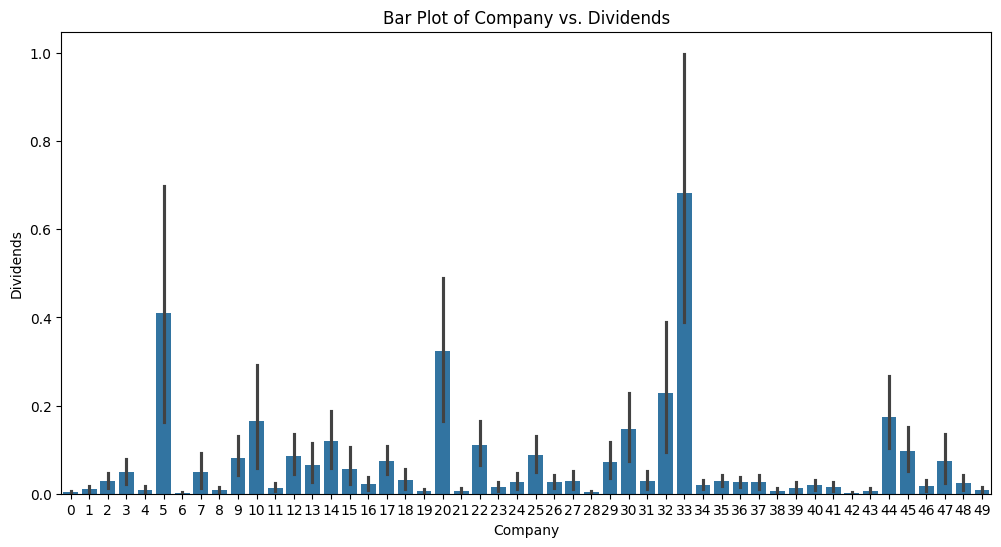

In [18]:
# Bar plot of Dividends by Company
plt.figure(figsize=(12, 6))
sns.barplot(x="Company", y="Dividends", data=df)
plt.xlabel('Company')
plt.ylabel('Dividends')
plt.title('Bar Plot of Company vs. Dividends')
plt.show()

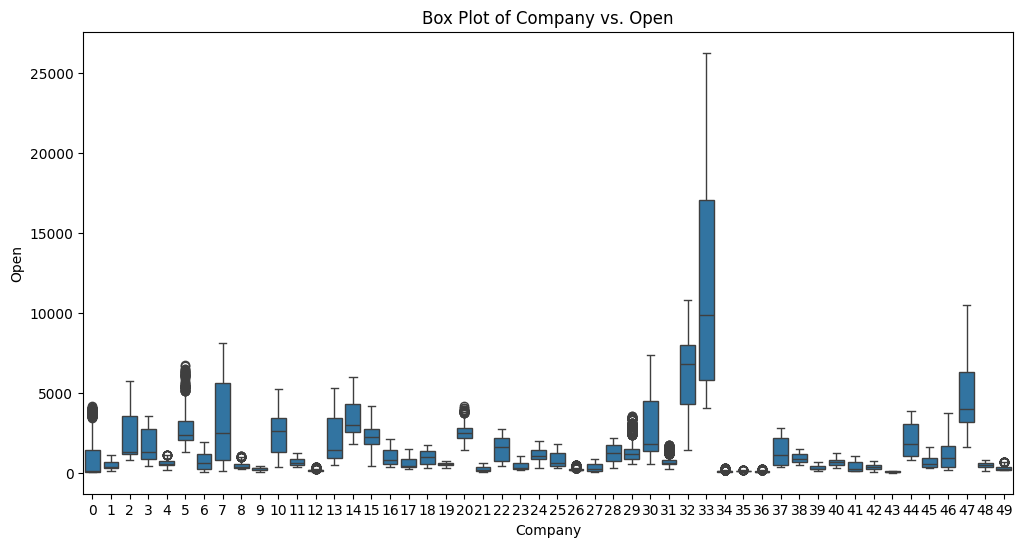

In [19]:
# Boxplot of Open values by Company
plt.figure(figsize=(12, 6))
sns.boxplot(x="Company", y="Open", data=df)
plt.xlabel('Company')
plt.ylabel('Open')
plt.title('Box Plot of Company vs. Open')
plt.show()

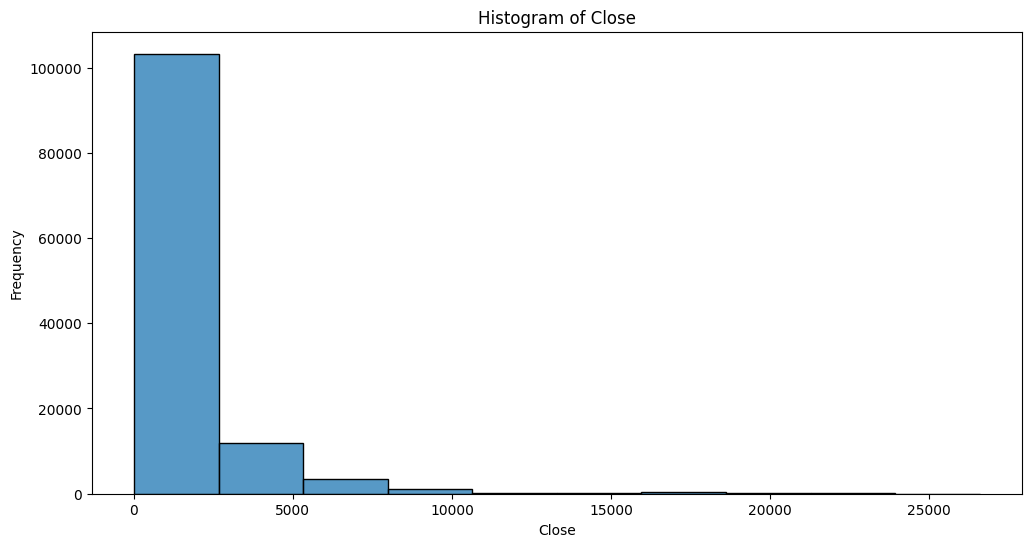

In [20]:
# Histogram of Close values
plt.figure(figsize=(12, 6))
sns.histplot(df["Close"], bins=10)
plt.xlabel('Close')
plt.ylabel('Frequency')
plt.title('Histogram of Close')
plt.show()

In [21]:
# Handling outliers to improve accuracy
import numpy as np
def outlier_detection(df):
  for feature in df.columns:
    if df[feature].dtype != 'object':
      IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
      lower_bound = df[feature].quantile(0.25) - 1.5 * IQR
      upper_bound = df[feature].quantile(0.75) + 1.5 * IQR
      df[feature] = np.where((df[feature] < lower_bound) | (df[feature] > upper_bound), df[feature].median(), df[feature])
  return df
X = outlier_detection(X)
X.head()

Open    Volume  Dividends  Stock Splits  Company
0 -0.620725 -0.093167   -0.03899           0.0      0.0
1  0.069346 -0.397509   -0.03899           0.0     20.0
2 -0.498271 -0.288752   -0.03899           0.0     18.0
3 -0.527484 -0.318661   -0.03899           0.0     17.0
4 -0.461528 -0.393387   -0.03899           0.0     16.0

##**Splitting the dataset**

In [22]:
#Splitting dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##**Model Implementation**

###**Gradient Boosting**

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Fitting(training) the dataset
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predicting based on testing data
y_pred_gb = gb_model.predict(X_test)

# Calculating metrics
print('Accuracy:', gb_model.score(X_test,y_test))
print('R2 Score:', r2_score(y_test, y_pred_gb))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_gb))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_gb))

Accuracy: 0.8407753850516446
R2 Score: 0.8407753850516446
Mean Absolute Error: 220.3971074065685
Mean Squared Error: 809809.901403782


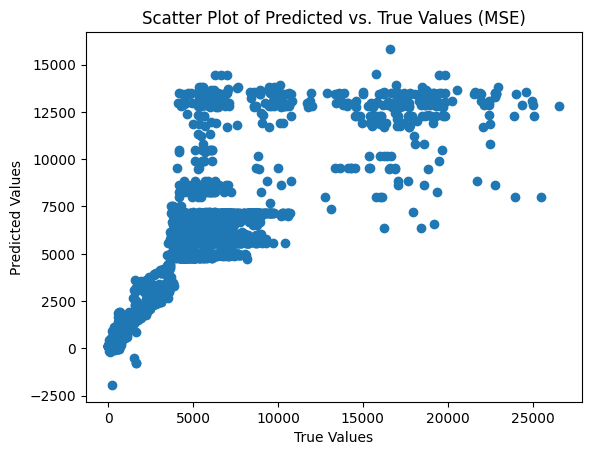

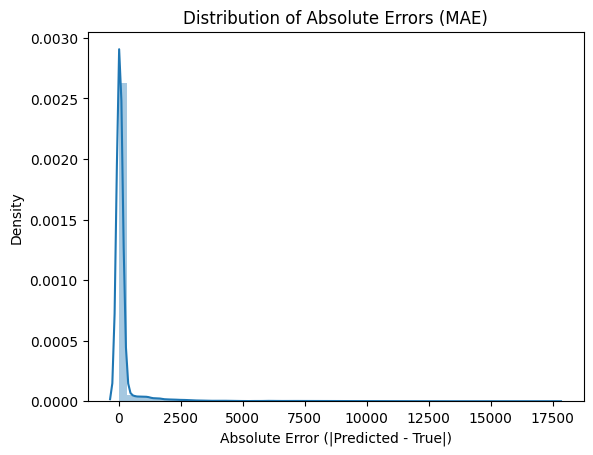

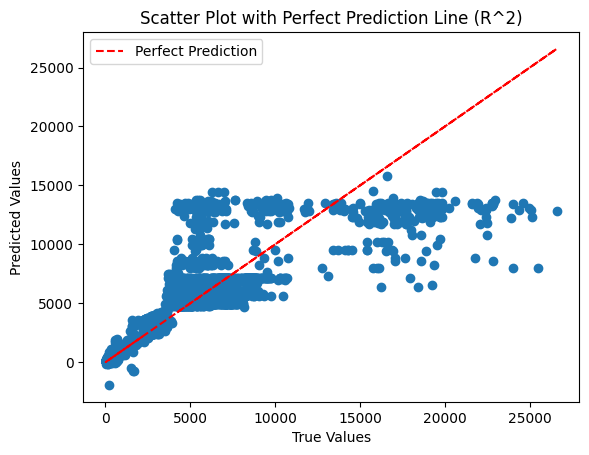

In [24]:
# Plot for Mean Squared Error
plt.scatter(y_test, y_pred_gb)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. True Values (MSE)')
plt.show()

# Plot for Mean Absolute Error
errors = abs(y_test - y_pred_gb)
sns.distplot(errors)
plt.xlabel('Absolute Error (|Predicted - True|)')
plt.ylabel('Density')
plt.title('Distribution of Absolute Errors (MAE)')
plt.show()

# Plot for R2 Score
plt.scatter(y_test, y_pred_gb)
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')  # Reference line
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot with Perfect Prediction Line (R^2)')
plt.legend()
plt.show()

###**XGBoost**

In [25]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Fitting(training) the dataset
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predicting based on testing data
y_pred_xgb = xgb_model.predict(X_test)

# Calculating metrics
print('Accuracy:', xgb_model.score(X_test,y_test))
print('R2 Score:', r2_score(y_test, y_pred_xgb))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_xgb))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_xgb))

Accuracy: 0.8547780472696447
R2 Score: 0.8547780472696447
Mean Absolute Error: 171.91816397714322
Mean Squared Error: 738592.9321316188


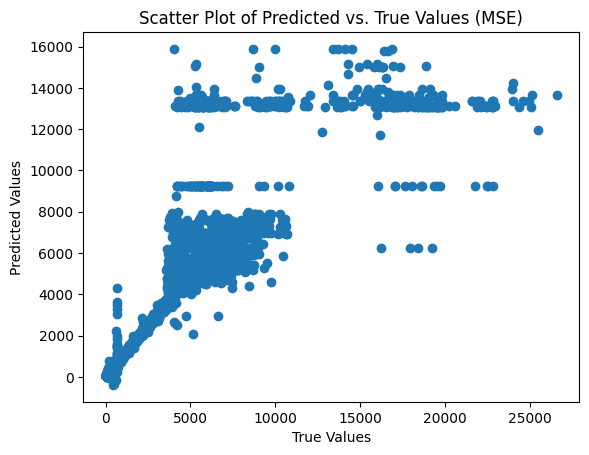

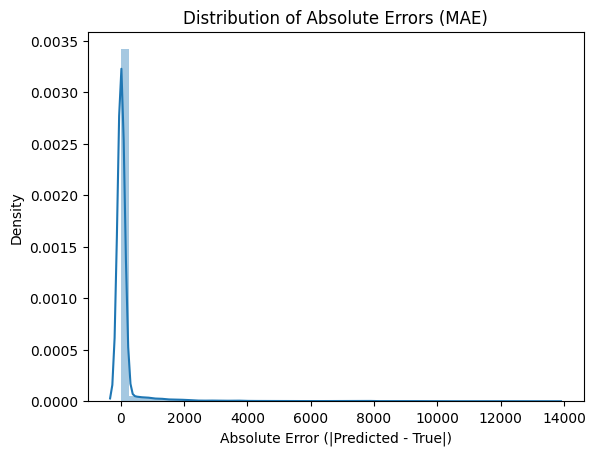

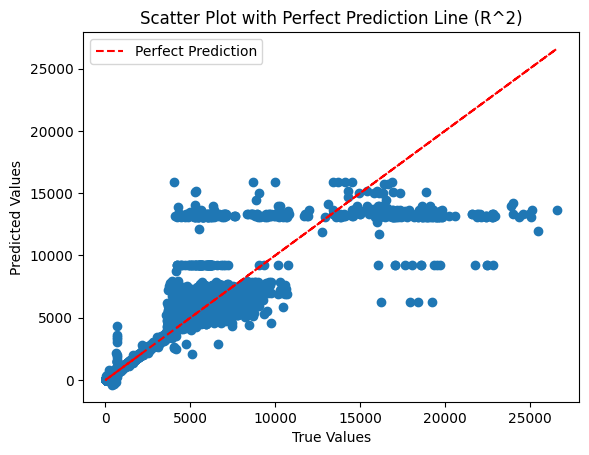

In [26]:
# Plot for Mean Squared Error
plt.scatter(y_test, y_pred_xgb)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. True Values (MSE)')
plt.show()

# Plot for Mean Absolute Error
errors = abs(y_test - y_pred_xgb)
sns.distplot(errors)
plt.xlabel('Absolute Error (|Predicted - True|)')
plt.ylabel('Density')
plt.title('Distribution of Absolute Errors (MAE)')
plt.show()

# Plot for R2 Score
plt.scatter(y_test, y_pred_xgb)
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')  # Reference line
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot with Perfect Prediction Line (R^2)')
plt.legend()
plt.show()

##**Explainable AI - LIME**

In [27]:
! pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=084c8a9742cd0585cc0cffb967c7e347369054d49363bb93675fe46a131382cf
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [28]:
import lime                    # used in XAI
from lime import lime_tabular

# defining an interpretor which helps in interpreting the prediction
interpretor = lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    class_names=['Close'],
    mode = 'regression'
)

In [29]:
# For Gradient Boosting model
exp = interpretor.explain_instance(
    data_row=X_test.iloc[0].values,         # instance of which we want to visualize
    predict_fn=gb_model.predict             # function to predict
)

exp.show_in_notebook(show_table=True)

In [30]:
# For XGBoosting model
exp1 = interpretor.explain_instance(
    data_row=X_test.iloc[0].values,
    predict_fn=xgb_model.predict
)

exp1.show_in_notebook(show_table=True)

# Model Comparison

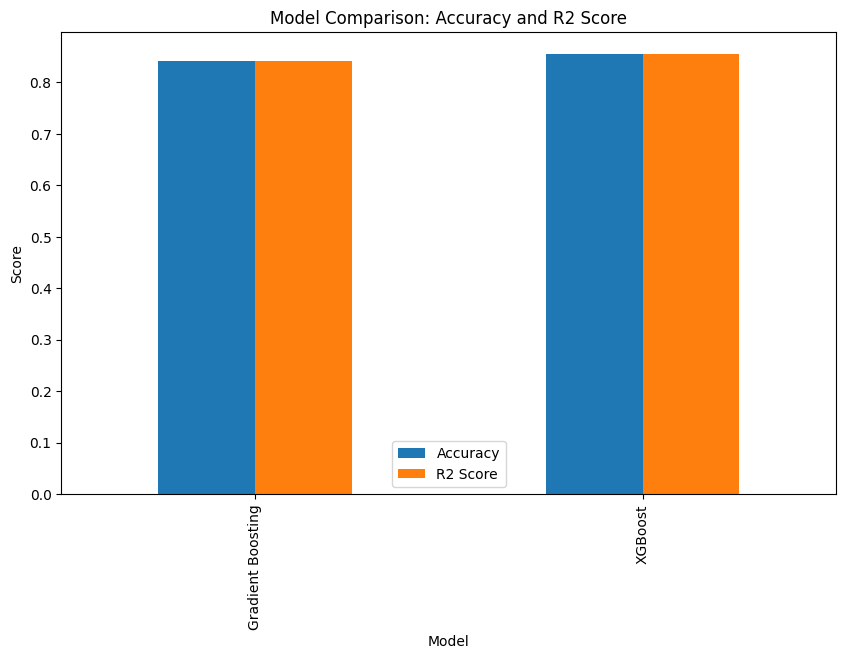

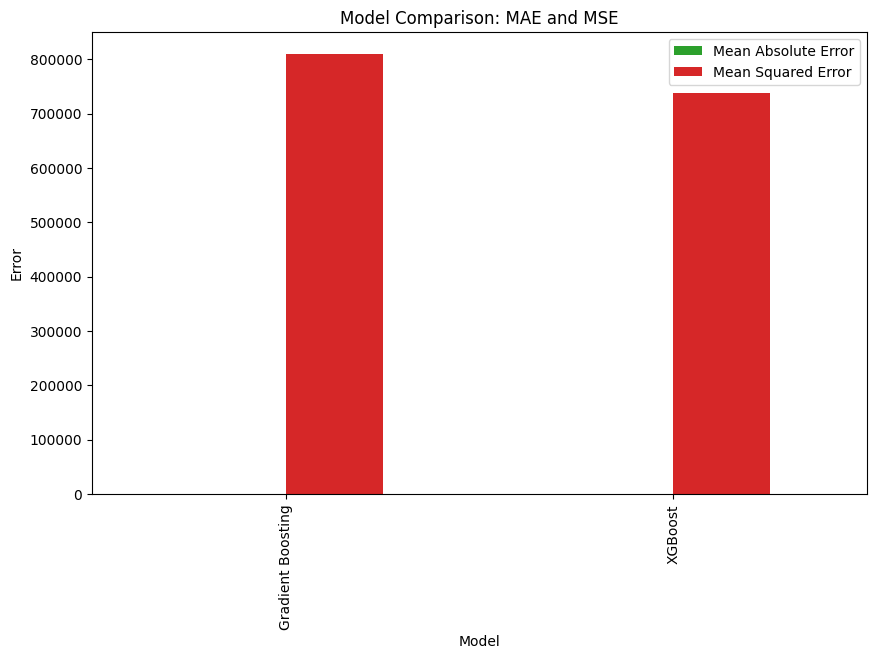

In [34]:
data = {
    'Model': ['Gradient Boosting', 'XGBoost'],
    'Accuracy': [0.841, 0.855],
    'R2 Score': [0.841, 0.855],
    'Mean Absolute Error': [220.397, 171.918],
    'Mean Squared Error': [809809.901, 738592.932]
}

df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Accuracy and R2 Score
df.plot(kind='bar', x='Model', y=['Accuracy', 'R2 Score'], ax=ax, color=['#1f77b4', '#ff7f0e'])
ax.set_ylabel('Score')
ax.set_title('Model Comparison: Accuracy and R2 Score')

plt.show()

# MAE and MSE
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
df.plot(kind='bar', x='Model', y=['Mean Absolute Error', 'Mean Squared Error'], ax=ax, color=['#2ca02c', '#d62728'])
ax.set_ylabel('Error')
ax.set_title('Model Comparison: MAE and MSE')

plt.show()
